<a href="https://colab.research.google.com/github/DheerajGolla9/PDS/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset
df = pd.read_csv("diabetes.csv")

In [4]:
# Set seed and sample 25 records
np.random.seed(42)
sample_25 = df.sample(n=25, random_state=42)

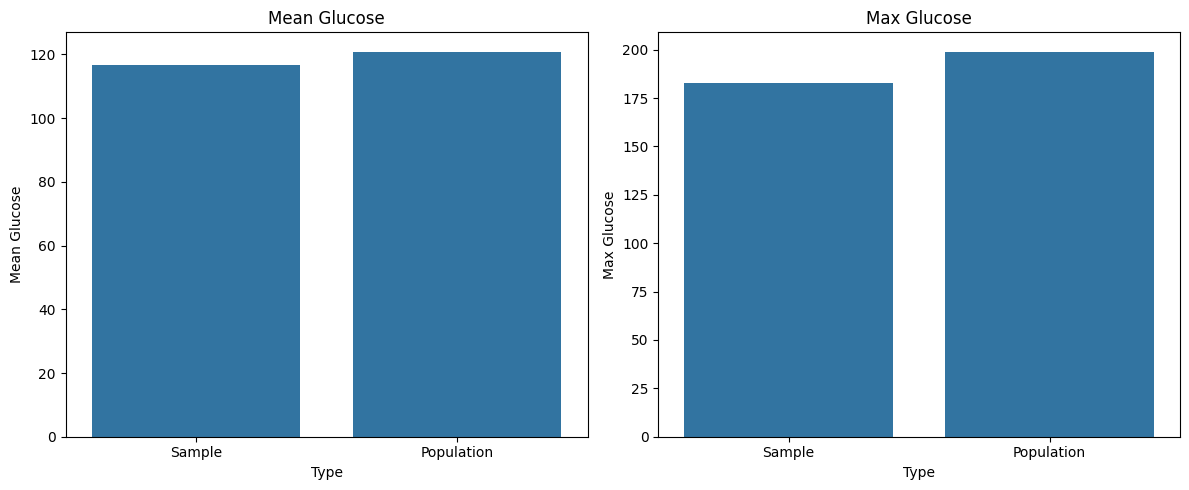

In [5]:
# Mean and max Glucose
sample_mean_glucose = sample_25["Glucose"].mean()
sample_max_glucose = sample_25["Glucose"].max()
pop_mean_glucose = df["Glucose"].mean()
pop_max_glucose = df["Glucose"].max()

glucose_comparison = pd.DataFrame({
    "Type": ["Sample", "Population"],
    "Mean Glucose": [sample_mean_glucose, pop_mean_glucose],
    "Max Glucose": [sample_max_glucose, pop_max_glucose]
})

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.barplot(data=glucose_comparison, x="Type", y="Mean Glucose", ax=axs[0])
axs[0].set_title("Mean Glucose")

sns.barplot(data=glucose_comparison, x="Type", y="Max Glucose", ax=axs[1])
axs[1].set_title("Max Glucose")
plt.tight_layout()
plt.show()

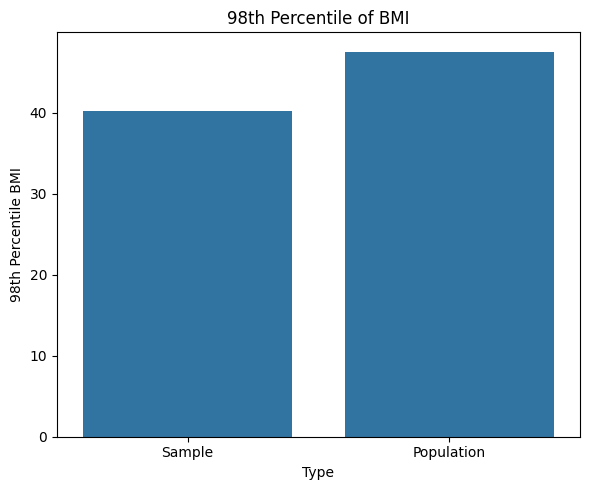

In [6]:
# 98th Percentile of BMI
sample_bmi_98th = np.percentile(sample_25["BMI"], 98)
pop_bmi_98th = np.percentile(df["BMI"], 98)
bmi_comparison = pd.DataFrame({
    "Type": ["Sample", "Population"],
    "98th Percentile BMI": [sample_bmi_98th, pop_bmi_98th]
})
plt.figure(figsize=(6, 5))
sns.barplot(data=bmi_comparison, x="Type", y="98th Percentile BMI")
plt.title("98th Percentile of BMI")
plt.tight_layout()
plt.show()

In [7]:
# Bootstrap BloodPressure stats
bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = []
for _ in range(500):
    sample = df["BloodPressure"].sample(n=150, replace=True)
    bootstrap_means.append(sample.mean())
    bootstrap_stds.append(sample.std())
    bootstrap_percentiles.append(np.percentile(sample, 98))

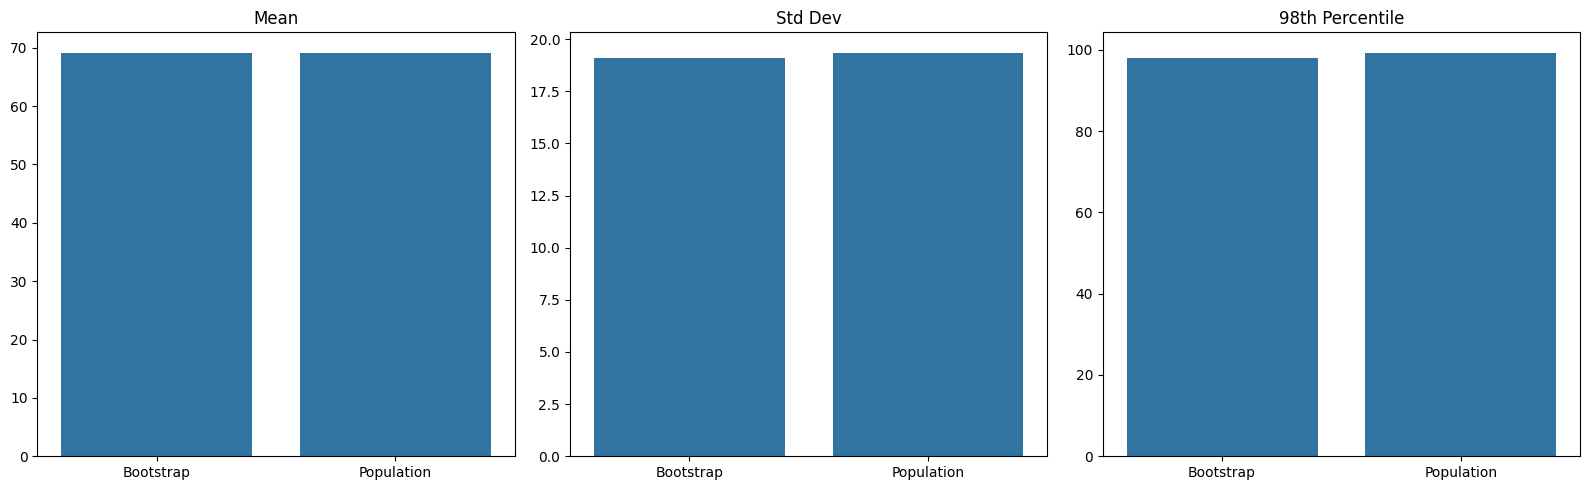

In [8]:
# Population stats
pop_mean = df["BloodPressure"].mean()
pop_std = df["BloodPressure"].std()
pop_98th = np.percentile(df["BloodPressure"], 98)

bootstrap_stats = pd.DataFrame({
    "Statistic": ["Mean", "Standard Deviation", "98th Percentile"],
    "Bootstrap": [
        np.mean(bootstrap_means),
        np.mean(bootstrap_stds),
        np.mean(bootstrap_percentiles)
    ],
    "Population": [pop_mean, pop_std, pop_98th]
})

fig, axs = plt.subplots(1, 3, figsize=(16, 5))
sns.barplot(x=["Bootstrap", "Population"],
            y=[bootstrap_stats.loc[0, "Bootstrap"], bootstrap_stats.loc[0, "Population"]],
            ax=axs[0]).set_title("Mean")

sns.barplot(x=["Bootstrap", "Population"],
            y=[bootstrap_stats.loc[1, "Bootstrap"], bootstrap_stats.loc[1, "Population"]],
            ax=axs[1]).set_title("Std Dev")

sns.barplot(x=["Bootstrap", "Population"],
            y=[bootstrap_stats.loc[2, "Bootstrap"], bootstrap_stats.loc[2, "Population"]],
            ax=axs[2]).set_title("98th Percentile")

plt.tight_layout()
plt.show()